(1427, 2100, 3)


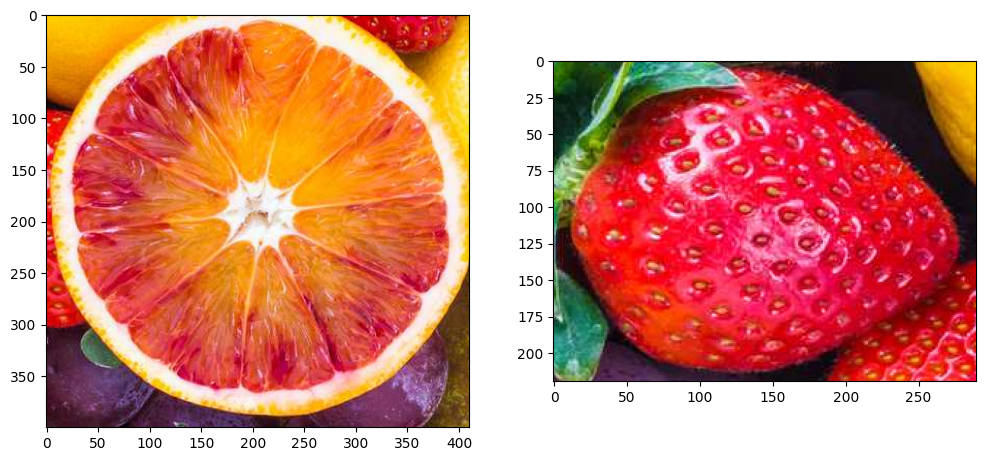

In [23]:
# 1.1 chọn đối tượng trong ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('./fruit.jpg')
bmg = data[800:1200, 570:980] #[y1:y2, x1:x2]
print(data.shape)
cdata = data[760:980, 240:530]

iio.imsave('orange.jpg', bmg)
iio.imsave('strawberry.jpg', cdata)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bmg)
plt.subplot(1, 2, 2)
plt.imshow(cdata, cmap='gray')
plt.show()

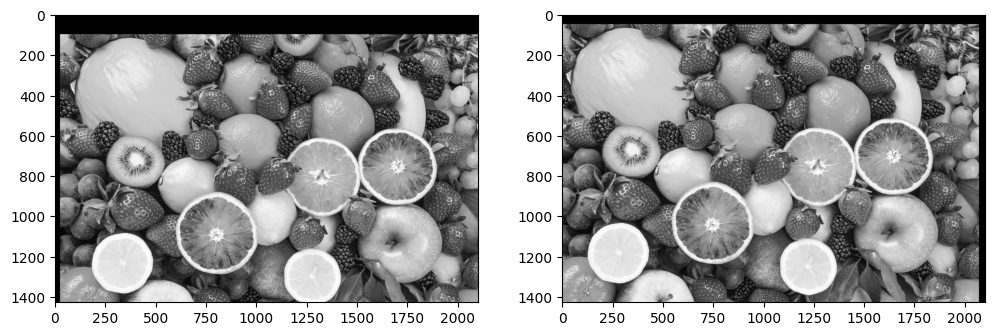

In [ ]:
# 1.2 tịnh tiến đơn
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('./fruit.jpg', mode='F')
bdata = nd.shift(data, (100,25)) # nd.shift(image, (y, x))
cdata = nd.shift(data, (50, -30))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bdata, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(cdata, cmap='gray')
plt.show()

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


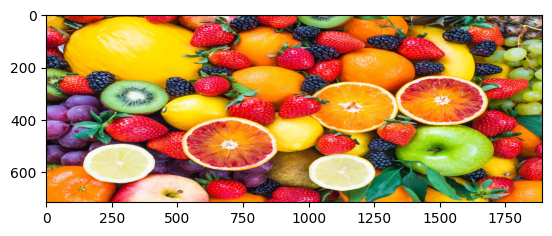

In [5]:
# 1.3 thay đổi kích thướt ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('./fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

(4281, 6300)


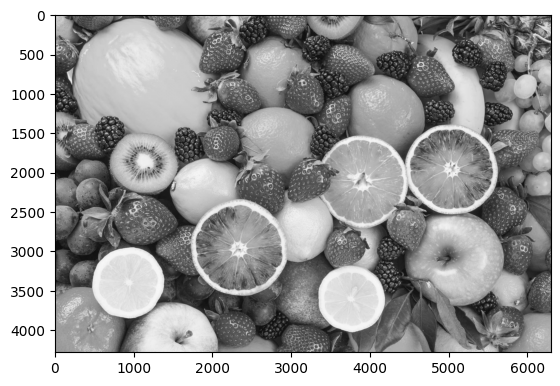

In [29]:
zoom3 = nd.zoom(data, 3)
print(zoom3.shape)
plt.imshow(zoom3, cmap='gray')
plt.show()

(428, 630)


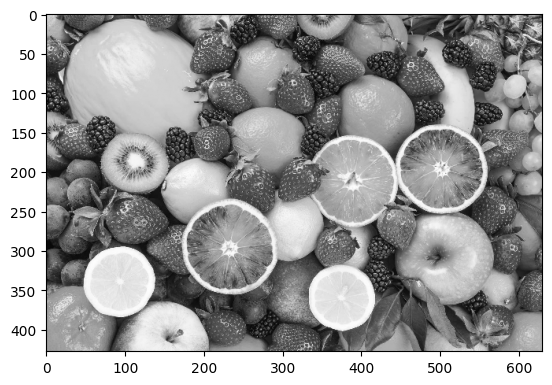

In [31]:
zdata = nd.zoom(data, 0.3)
print(zdata.shape)
plt.imshow(zdata, cmap='gray')
plt.show()

(1427, 2100, 3)


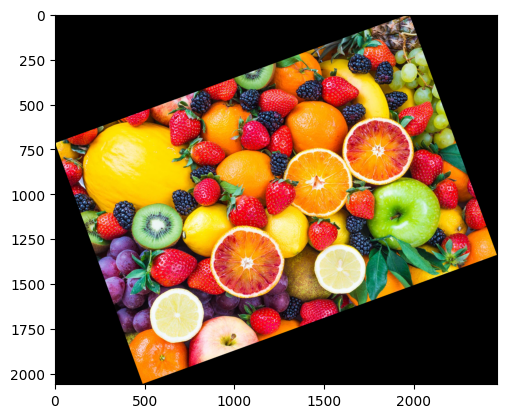

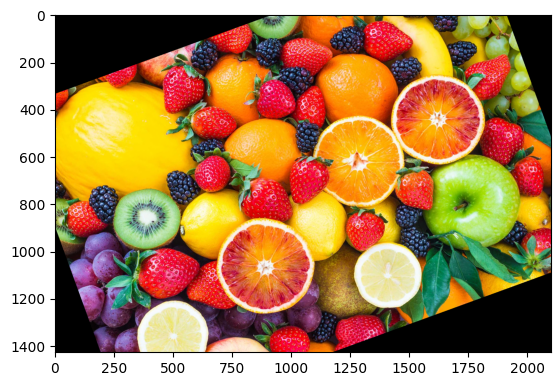

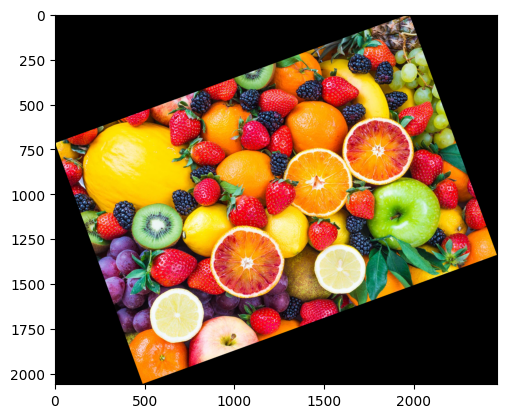

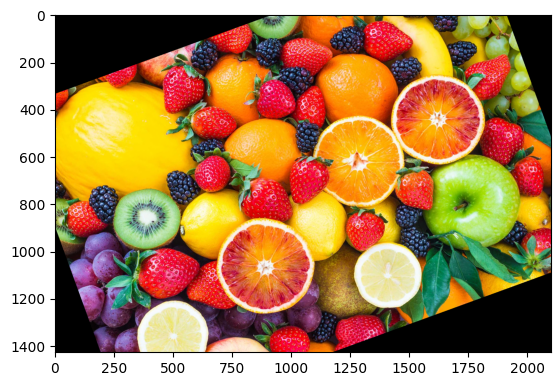

In [33]:
# 1.4 xoay ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('./fruit.jpg')
print(data.shape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

d3 = nd.rotate(data, 45)
plt.imshow(d1)
plt.show()

d4 = nd.rotate(data, 45, reshape=False)
plt.imshow(d2)
plt.show()

(309, 515)


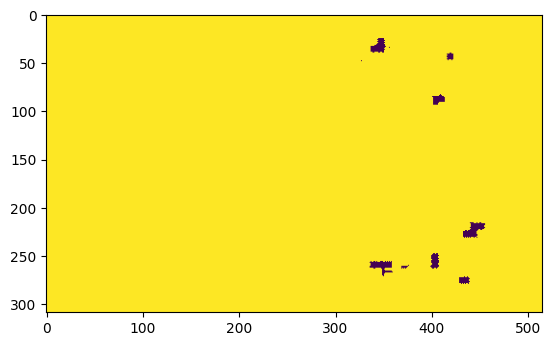

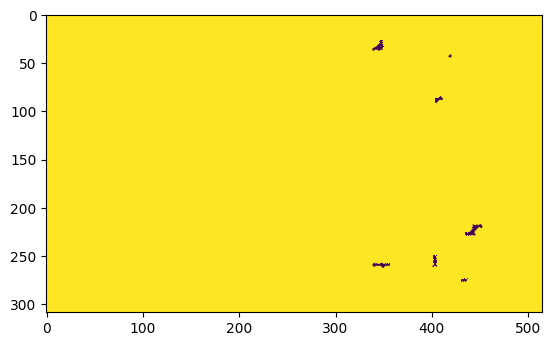

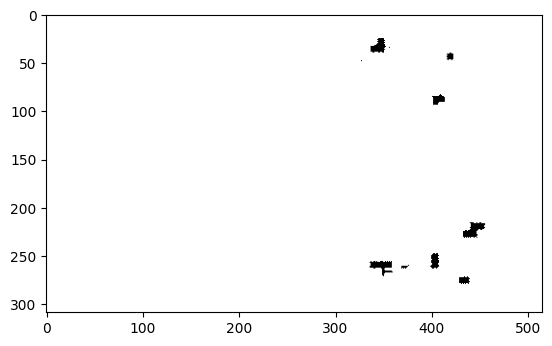

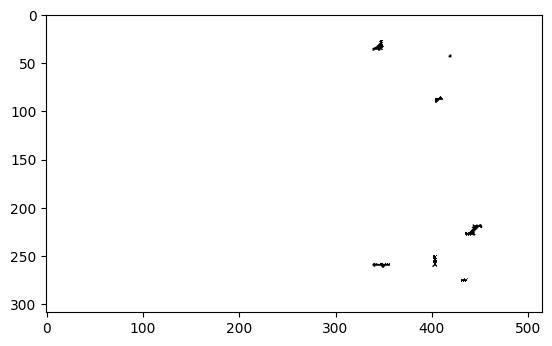

In [ ]:
# 1.5 Dilation và Erosion
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd
from PIL import Image

data = iio.imread('./world_cup.jpg', mode='F')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

image = Image.fromarray(data)
image_resized = image.resize((5, 5), Image.LANCZOS)
data_resized = np.array(image_resized)

d3 = nd.binary_dilation(data_resized)
plt.imshow(d1, cmap='gray')
plt.show()

d4 = nd.binary_dilation(data_resized, iterations=3)
plt.imshow(d2, cmap='gray')
plt.show()

(309, 515)


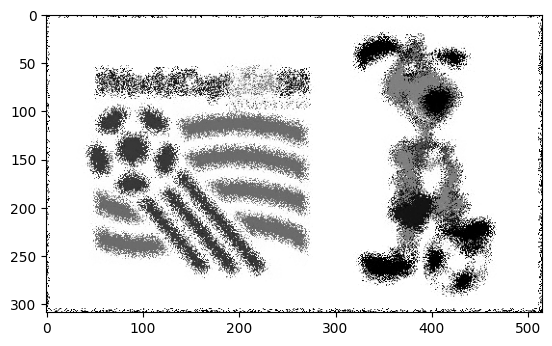

In [51]:
# 1.6 Croordinate Mapping
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('./world_cup.jpg', mode='F')
print(data.shape)

V, H = data.shape
M = np.indices((V, H))
d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1, cmap='gray')
plt.show()

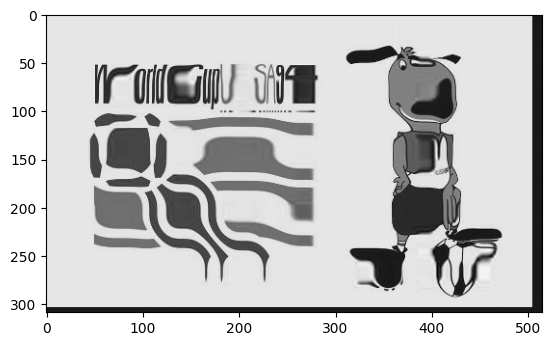

In [1]:
# 1.7 biến đổi chung (Generic Transformation)
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

# Đọc ảnh
data = iio.imread('world_cup.jpg', mode='F')

# Áp dụng biến đổi
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1, cmap='gray')
plt.show()

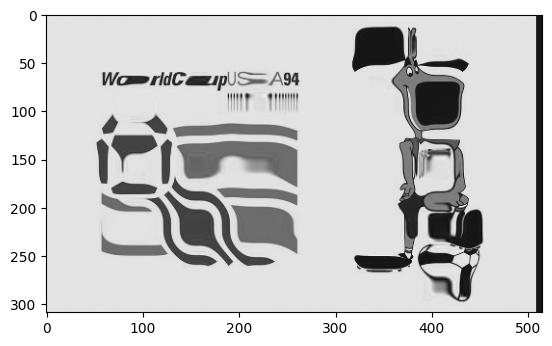

In [54]:
def GeoFun(outcoord):
    a = 10 * np.sin(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1]/10.0) + outcoord[1]
    return a, b

# Đọc ảnh
data = iio.imread('world_cup.jpg', mode='F')

# Áp dụng biến đổi
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1, cmap='gray')
plt.show()